<a href="https://colab.research.google.com/github/robgon-art/digital-art-showdown/blob/main/Esthetic_Test_Good_Art_vs_Bad_Art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!unzip art.zip

Archive:  art.zip


  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of art.zip or
        art.zip.zip, and cannot find art.zip.ZIP, period.


In [7]:
import glob
file_list = glob.glob("*art/*.*")
file_list.sort()
print(file_list)

[]


In [8]:
%pip install ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Cloning https://github.com/openai/CLIP.git to c:\users\lxb\appdata\local\temp\pip-req-build-9ctugn7_
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\lxb\AppData\Local\Temp\pip-req-build-9ctugn7_'
  fatal: unable to access 'https://github.com/openai/CLIP.git/': Failed to connect to github.com port 443 after 21137 ms: Couldn't connect to server
  error: subprocess-exited-with-error
  
  git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\lxb\AppData\Local\Temp\pip-req-build-9ctugn7_' did not run successfully.
  exit code: 128
  
  See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\lxb\AppData\Local\Temp\pip-req-build-9ctugn7_' did not run successfully.
exit code: 128

See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [9]:
import clip
print(clip.available_models())

c:\code\conada\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14', 'ViT-L/14@336px']


In [10]:
import torch
import clip
from PIL import Image
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)

100%|████████████████████████████████████████| 891M/891M [19:25<00:00, 801kiB/s]


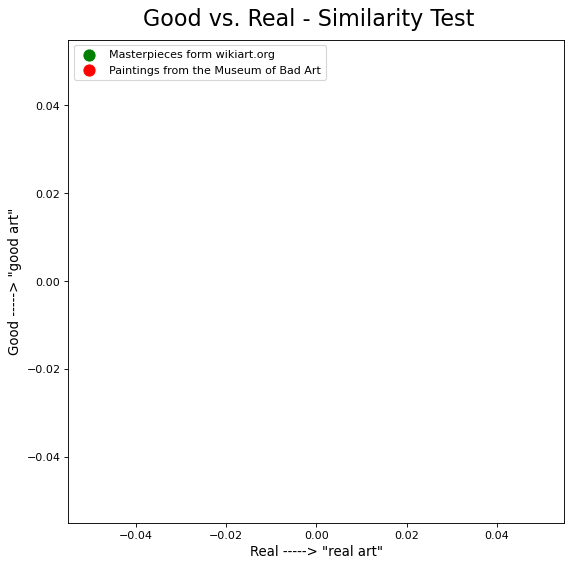

In [11]:
reals = []
goods = []
labels = []

for i, f in enumerate(file_list):
  parts = f.split("/")
  if i<9:
    label = "B" + parts[1][:2]
  else:
    label = "G" + parts[1][:2]  
  labels.append(label)
  image = preprocess(Image.open(f)).unsqueeze(0).to(device)
  text = clip.tokenize(["real art", "good art"]).to(device)

  with torch.no_grad():
    image_features = model.encode_image(image)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features = model.encode_text(text)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

  real = similarity[0][0]
  good = similarity[1][0]

  reals.append(real)
  goods.append(good)

  print("{:.4f}".format(real), "{:.4f}".format(good), f)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
fig.suptitle('Good vs. Real - Similarity Test', fontsize=20, y=0.93)
plt.xlabel('Real -----> "real art"', fontsize=12)
plt.ylabel('Good -----> "good art"', fontsize=12)
plt.scatter(reals[9:], goods[9:], color = 'green', s=100, label="Masterpieces form wikiart.org")
plt.scatter(reals[:9], goods[:9], color = 'red', s=100, label="Paintings from the Museum of Bad Art")
plt.legend(loc="upper left")
for i, txt in enumerate(labels):
  ax.annotate(txt, (reals[i]+0.0009, goods[i]-0.0003))
plt.show()

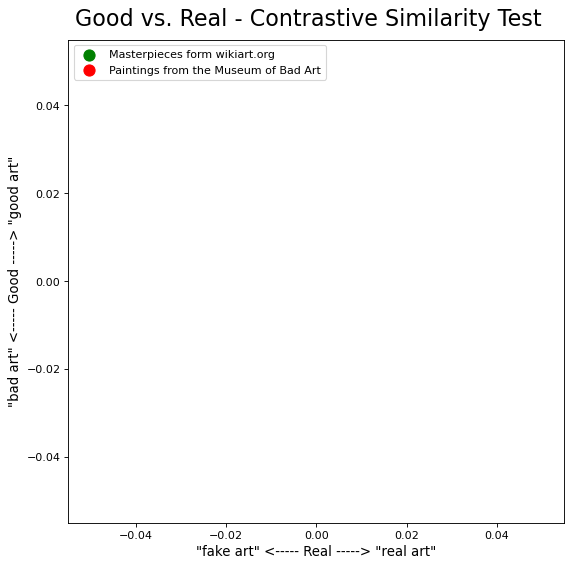

In [12]:
reals = []
goods = []
labels = []

for i, f in enumerate(file_list):
  parts = f.split("/")
  if i<9:
    label = "B" + parts[1][:2]
  else:
    label = "G" + parts[1][:2]  
  labels.append(label)
  image = preprocess(Image.open(f)).unsqueeze(0).to(device)
  text = clip.tokenize(["fake art", "real art", "bad art", "good art"]).to(device)

  with torch.no_grad():
    image_features = model.encode_image(image)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features = model.encode_text(text)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

  fake = similarity[0][0]
  real = similarity[1][0]
  bad = similarity[2][0]
  good = similarity[3][0]

  reals.append(real-fake)
  goods.append(good-bad)

  print("{:.4f}".format(real-fake), "{:.4f}".format(good-bad), f)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
fig.suptitle("Good vs. Real - Contrastive Similarity Test", fontsize=20, y=0.93)
plt.xlabel('"fake art" <----- Real -----> "real art"', fontsize=12)
plt.ylabel('"bad art" <----- Good -----> "good art"', fontsize=12)
plt.scatter(reals[9:], goods[9:], color = 'green', s=100, label="Masterpieces form wikiart.org")
plt.scatter(reals[:9], goods[:9], color = 'red', s=100, label="Paintings from the Museum of Bad Art")
plt.legend(loc="upper left")
for i, txt in enumerate(labels):
  ax.annotate(txt, (reals[i]+0.0009, goods[i]-0.0003))
plt.show()

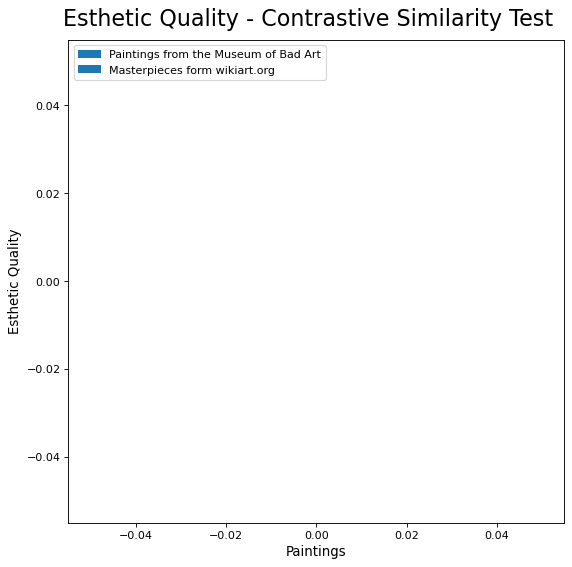

In [14]:
import numpy as np
bad_data = np.array(goods[:9]) + np.array(reals[:9])
good_data = np.array(goods[9:]) + np.array(reals[9:])


fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
fig.suptitle("Esthetic Quality - Contrastive Similarity Test", fontsize=20, y=0.93)

plt.bar(labels[:9], bad_data, color = 'red', label="Paintings from the Museum of Bad Art")
plt.bar(labels[9:], good_data, color = 'green', label="Masterpieces form wikiart.org")

plt.legend(loc="upper left")

plt.xlabel('Paintings', fontsize=12)
plt.ylabel('Esthetic Quality', fontsize=12)
plt.show()